**Unsupervised**

In [1]:
import numpy as np

In [2]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [3]:
from tensorflow import keras

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.1))

In [4]:
history = autoencoder.fit(X_train, X_train, epochs=20)
codings = encoder.predict(X_train)

Epoch 1/20
2/2 [==============================] - 0s 3ms/step - loss: 0.5763
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.4444
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 0.3371
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2401
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2043
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1669
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1470
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1284
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1206
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1032
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0975
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss: 0.

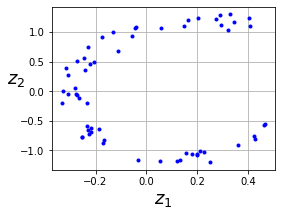

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()